# 1. Prefix Tree 클래스 구현

208. Implement Trie (Prefix Tree)

https://leetcode.com/problems/implement-trie-prefix-tree/


    A trie (pronounced as "try") or prefix tree is a tree data structure used to efficiently store and retrieve keys in a dataset of strings. There are various applications of this data structure, such as autocomplete and spellchecker.

    Implement the Trie class:

    Trie() Initializes the trie object.
    void insert(String word) Inserts the string word into the trie.
    boolean search(String word) Returns true if the string word is in the trie (i.e., was inserted before), and false otherwise.
    boolean startsWith(String prefix) Returns true if there is a previously inserted string word that has the prefix prefix, and false otherwise.


    Example 1:

    Input
    ["Trie", "insert", "search", "search", "startsWith", "insert", "search"]
    [[], ["apple"], ["apple"], ["app"], ["app"], ["app"], ["app"]]
    
    Output
    [null, null, true, false, true, null, true]

    Explanation
    Trie trie = new Trie();
    trie.insert("apple");
    trie.search("apple");   // return True
    trie.search("app");     // return False
    trie.startsWith("app"); // return True
    trie.insert("app");
    trie.search("app");     // return True


**Constraints**

    1 <= word.length, prefix.length <= 2000
    word and prefix consist only of lowercase English letters.
    At most 3 * 104 calls in total will be made to insert, search, and startsWith.

In [20]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfword = False

class Trie:

    def __init__(self):
        self.root = TrieNode()  

    def insert(self, word: str) -> None:
        cur = self.root
        for c in word:
            if c not in cur.children:
                cur.children[c] = TrieNode()
            cur = cur.children[c]
        cur.endOfword = True
        
    def search(self, word: str) -> bool:
        cur = self.root
        for c in word:
            if c not in cur.children:
                return False
            cur = cur.children[c]
        return cur.endOfword

    def startsWith(self, prefix: str) -> bool:
        cur = self.root
        for c in prefix:
            if c not in cur.children:
                return False
            cur = cur.children[c]
        return True

In [21]:
trie = Trie()
trie.insert('apple')
print(trie.search('apple'))
print(trie.search('app'))
print(trie.startsWith('app'))
trie.insert('app')
print(trie.search('app'))


True
False
True
True


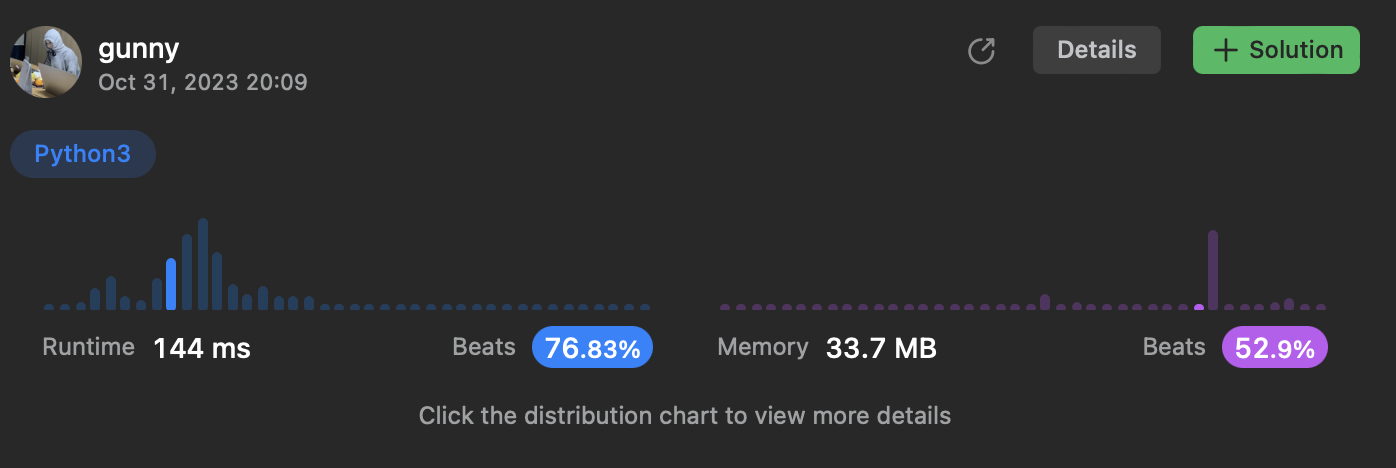

# 2. 와일드카드가 포함된 단어 찾기 - 트라이 클래스 구현

211. Design Add and Search Words Data Structure

https://leetcode.com/problems/design-add-and-search-words-data-structure/

    Design a data structure that supports adding new words and finding if a string matches any previously added string.

    Implement the WordDictionary class:

    WordDictionary() Initializes the object.
    void addWord(word) Adds word to the data structure, it can be matched later.
    bool search(word) Returns true if there is any string in the data structure that matches word or false otherwise. word may contain dots '.' where dots can be matched with any letter.
 

    Example:

    Input
    ["WordDictionary","addWord","addWord","addWord","search","search","search","search"]
    [[],["bad"],["dad"],["mad"],["pad"],["bad"],[".ad"],["b.."]]
    
    Output
    [null,null,null,null,false,true,true,true]

    Explanation
    WordDictionary wordDictionary = new WordDictionary();
    wordDictionary.addWord("bad");
    wordDictionary.addWord("dad");
    wordDictionary.addWord("mad");
    wordDictionary.search("pad"); // return False
    wordDictionary.search("bad"); // return True
    wordDictionary.search(".ad"); // return True
    wordDictionary.search("b.."); // return True


**Constraints**

    1 <= word.length <= 25
    word in addWord consists of lowercase English letters.
    word in search consist of '.' or lowercase English letters.
    There will be at most 2 dots in word for search queries.
    At most 104 calls will be made to addWord and search.

In [40]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfword = False

class WordDictionary:

    def __init__(self):
        self.root= TrieNode()

    def addWord(self, word: str) -> None:
        cur = self.root
        for c in word:
            if c not in cur.children:
                cur.children[c] = TrieNode()
            cur = cur.children[c]
        cur.endOfword = True

    def search(self, word: str) -> bool:
        def dfs(i, root):
            cur = root
            for j in range(i, len(word)):
                c = word[j]
                if c=='.':
                    for child in cur.children.values():
                        if dfs(j+1, child):
                            return True
                    return False
                else:
                    if c not in cur.children:
                        return False
                    cur = cur.children[c]
            return cur.endOfword
                
        return dfs(0, self.root)

In [41]:
WD = WordDictionary()
WD.addWord('bad')
WD.addWord('dad')
WD.addWord('mad')
print(WD.search('pad'))
print(WD.search('bad'))
print(WD.search('.ad'))
print(WD.search('b..'))

False
True
True
True


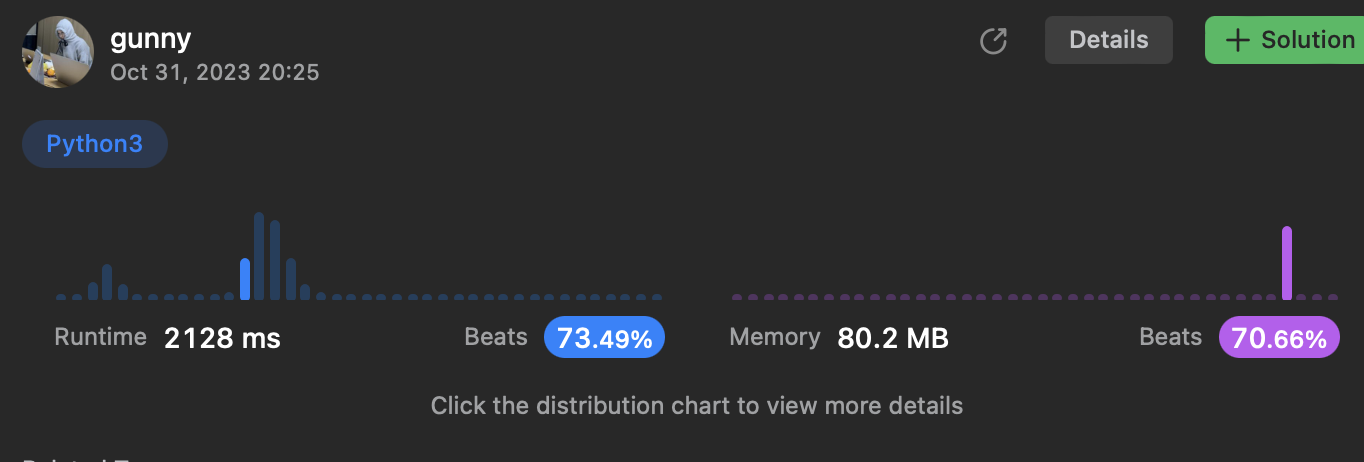

# 3. board(그리디) 내에서 단어 찾기 - Trie, backtracking

212. Word Search II

https://leetcode.com/problems/word-search-ii/

    Given an m x n board of characters and a list of strings words, return all words on the board.

    Each word must be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once in a word.

 

    Example 1:
    Input: board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]
    Output: ["eat","oath"]
    
    Example 2:
    Input: board = [["a","b"],["c","d"]], words = ["abcb"]
    Output: []


**Constraints:**

    m == board.length
    n == board[i].length
    1 <= m, n <= 12
    board[i][j] is a lowercase English letter.
    1 <= words.length <= 3 * 10^4
    1 <= words[i].length <= 10
    words[i] consists of lowercase English letters.
    All the strings of words are unique.



In [45]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.endOfword = False
    
    def addWord(self, word):
        cur = self
        for c in word:
            if c not in cur.children:
                cur.children[c] = TrieNode()
            cur = cur.children[c]
        cur.endOfword = True

class Solution:
    def findWords(self, board: list[list[str]], words: list[str]) -> list[str]:
        ROWS, COLS = len(board), len(board[0])
        
        root = TrieNode()
        for c in words:
            root.addWord(c)
        
        ans, visited = set(), set()
        def dfs(r,c, node, word):
            if r<0 or c<0 or r==ROWS or c==COLS or board[r][c] not in node.children or (r,c) in visited:
                return
            
            visited.add((r,c))
            word += board[r][c]
            node = node.children[board[r][c]]
            
            if node.endOfword:
                ans.add(word)
            
            dfs(r-1,c, node,word)
            dfs(r+1,c, node,word)
            dfs(r,c-1, node,word)
            dfs(r,c+1, node,word)
            visited.remove((r,c))
            
        for r in range(ROWS):
            for c in range(COLS):
                dfs(r,c, root, '')  
        
        return list(ans)

In [47]:
sol = Solution()
print(sol.findWords(board = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]], words = ["oath","pea","eat","rain"]))
print(sol.findWords(board = [["a","b"],["c","d"]], words = ["abcb"]))

['oath', 'eat']
[]


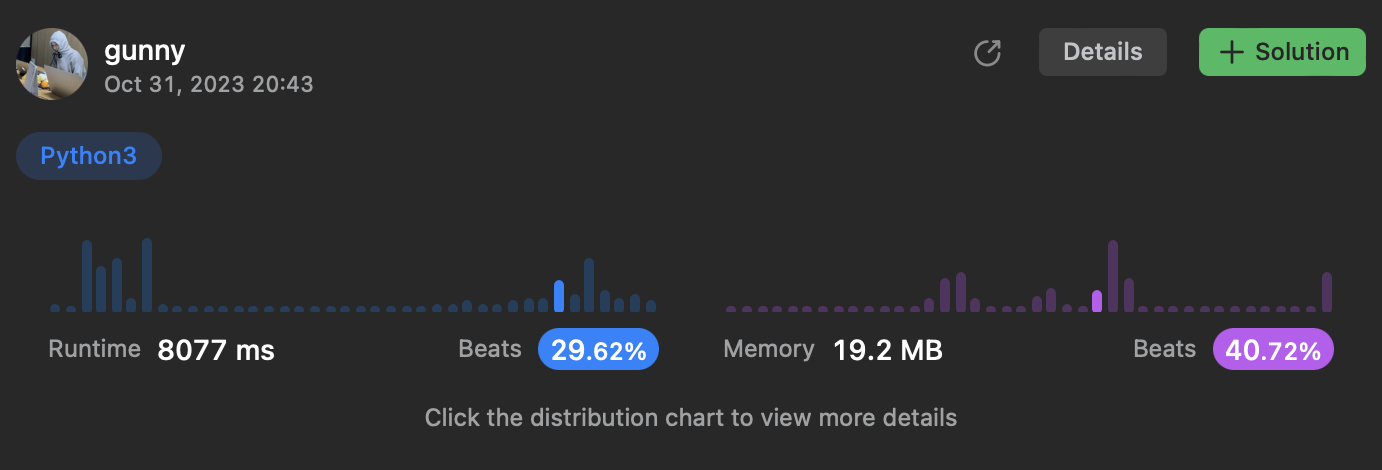